In [54]:
#importando dados e bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('../../../data/mock.csv')
df = pd.DataFrame(data)


In [55]:
#tratando o df
colunas = ['time_stamp']+[f'pergunta_{str(numero).zfill(2)}' for numero in range(1, 22)] + ['termos','nome', 'mail_01','idade','educacao','sexo','estado','trabalho','funcao','mail_02']

print(len(colunas), data.shape[1])
data.columns = colunas

#removendo as pessoas que discordaram dos termos e condições. 
df_com_termos = df[df['termos'] != 'Não']

#removendo pessoas com emails díspares

# e criar um novo DataFrame com as linhas correspondentes em df
df_com_email_coreto = df[df['mail_01'] == df['mail_02']]
#df_com_email_coreto = df[df_com_termos['mail_01'] == df_com_termos['mail_02']  ]
df = df_com_email_coreto


32 32


,time_stamp,pergunta_01,pergunta_02,pergunta_03,pergunta_04,pergunta_05,pergunta_06,pergunta_07,pergunta_08,pergunta_09,...,termos,nome,mail_01,idade,educacao,sexo,estado,trabalho,funcao,mail_02
0,18/08/2023 10:23:07,2,1,3,0,2,1,3,0,2,...,Sim,Junior Silva,daniel@gmail.com,19-30,Ensino Fundamental incompleto,Masculino,AM,construtor,Não,daniel@gmail.com
1,18/08/2023 10:23:07,2,2,3,4,2,3,1,2,3,...,Sim,Marina Silva,marina@gmail.com,19-30,Ensino Fundamental completo,Feminino,RJ,construtor,Sim,marina@gmail.com
2,18/08/2023 16:03:02,0,1,1,1,3,0,3,1,3,...,Sim,Natael Sampaio,natael_engenheiro@gmail.com,31-40,Ensino Médio completo,Masculino,SP,Engenheiro,Não,natael_engenheiro@gmail.com
3,18/08/2023 16:30:03,3,3,3,3,3,3,3,3,3,...,Sim,Caroline Yu,carol@beheart.app,31-40,Ensino Superior completo,Feminino,CE,Publi,Sim,carol@beheart.app
5,22/08/2023 07:59:26,2,1,0,0,2,3,0,1,3,...,Sim,João Marcondes,joaomarcondes@gmail.com,41-50,Ensino Superior completo,Masculino,CE,Engenheiro,Não,joaomarcondes@gmail.com
6,22/08/2023 07:59:26,2,1,0,0,2,3,0,1,3,...,Sim,Marcelo Guerra,marceloguerra@gmail.com,19-30,Ensino Superior incompleto,Masculino,SP,Engenheiro,Sim,marceloguerra@gmail.com
8,18/08/2023 17:15:22,3,3,2,1,3,2,1,2,3,...,Sim,Lucas Santos,lucas@example.com,31-40,Ensino Superior completo,Masculino,SP,Engenheiro,Não,lucas@example.com
9,19/08/2023 09:30:45,2,1,0,2,1,0,3,2,1,...,Sim,Maria Fernandes,maria@example.com,51-60,Ensino Médio completo,Feminino,BA,Professora,Sim,maria@example.com
10,19/08/2023 10:20:18,3,3,3,2,3,2,3,3,2,...,Não,Rodrigo Lima,rodrigo@example.com,31-40,Ensino Superior completo,Masculino,RS,Advogado,Sim,rodrigo@example.com
11,20/08/2023 14:05:33,1,1,2,1,0,2,1,3,0,...,Sim,Beatriz Souza,beatriz@example.com,19-30,Ensino Médio incompleto,Feminino,SP,Atendente,Não,beatriz@example.com


## Dados demográficos

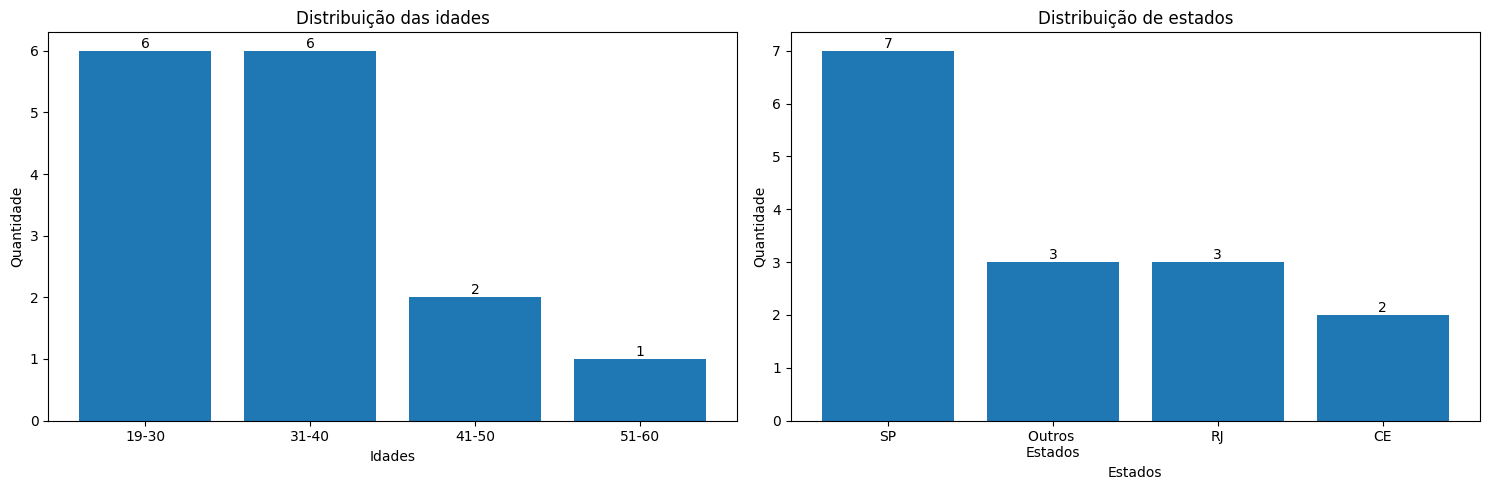

In [56]:
from matplotlib.ticker import MaxNLocator


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

#gráfico idade
count_idade = df['idade'].value_counts()
bars_idade = axs[0].bar(count_idade.index, count_idade.values)
axs[0].set_xlabel('Idades')
axs[0].set_ylabel('Quantidade')
axs[0].set_title('Distribuição das idades')


#top 3 estados mais recorrentes
estados_mais_recorrentes = (df['estado'].value_counts()[:3].index.tolist())

#se sexo for diferente do top 3, add como "outro"
df['estado'] = df['estado'].apply(lambda x: x if x in estados_mais_recorrentes else 'Outros \nEstados')

#gráfico gênero
count_genero = df['estado'].value_counts()
bars_genero = axs[1].bar(count_genero.index, count_genero.values)
axs[1].set_xlabel('Estados')
axs[1].set_ylabel('Quantidade')
axs[1].set_title('Distribuição de estados')


#escala y só com inteiros
axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].yaxis.set_major_locator(MaxNLocator(integer=True))

#números de y sobre as bars
for bar in bars_idade:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars_genero:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Index(['Ensino Superior completo', 'Ensino Médio completo',
       'Ensino Médio incompleto', 'Ensino Fundamental incompleto',
       'Ensino Fundamental completo', 'Ensino Superior incompleto'],
      dtype='object')


Text(0.5, 1.0, 'Distribuição das escolaridades')

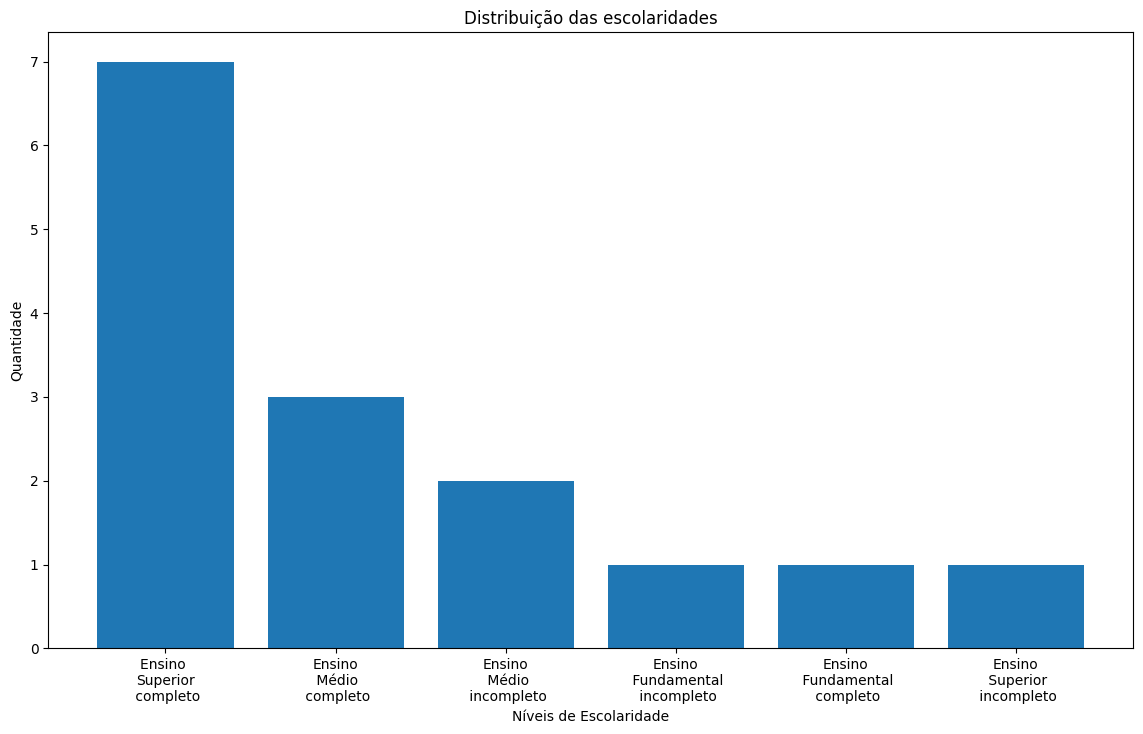

In [62]:
#gráfico escolaridade
from matplotlib import ticker



count_escolaridade = df['educacao'].value_counts()
print(count_escolaridade.index
      )
escolaridade_values=['Ensino \nSuperior\n completo', 'Ensino\n Médio\n completo',
       'Ensino\n Médio\n incompleto', 'Ensino\n Fundamental\n incompleto',
       'Ensino\n Fundamental\n completo', 'Ensino\n Superior\n incompleto']
plt.figure(figsize=(14, 8))
plt.bar(escolaridade_values, count_escolaridade.values)
plt.xlabel('Níveis de Escolaridade')
plt.ylabel('Quantidade')
plt.title('Distribuição das escolaridades')




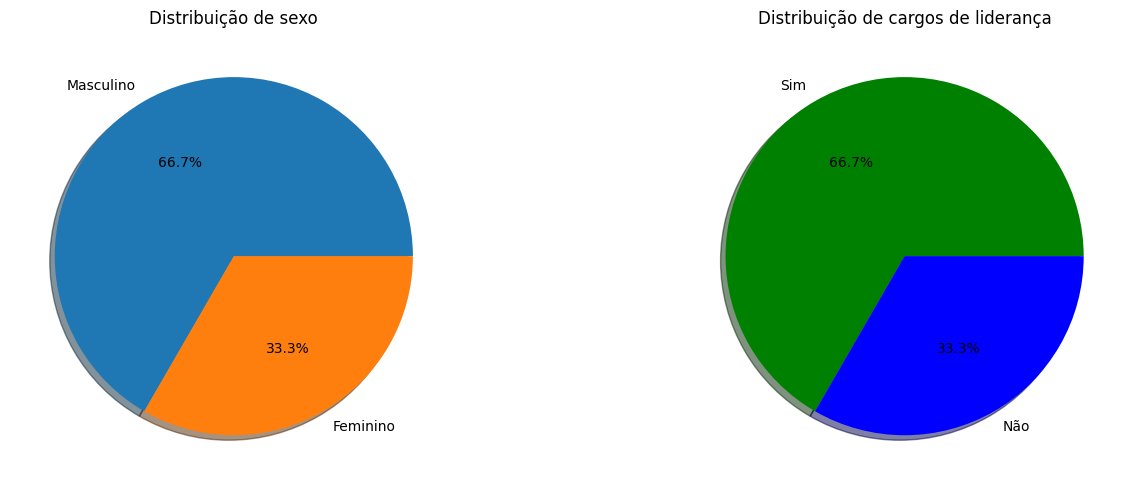

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


sexo = df['sexo'].value_counts()
axs[0].pie(sexo.values, labels=sexo.index, autopct='%1.1f%%', shadow=True)
axs[0].set_title('Distribuição de sexo')


sexo = df['funcao'].value_counts()
axs[1].pie(sexo.values, labels=sexo.index, autopct='%1.1f%%', shadow=True, colors=['green', 'blue'])
axs[1].set_title('Distribuição de cargos de liderança')

plt.tight_layout()
plt.show()

#https://matplotlib.org/stable/gallery/color/named_colors.html
